<a href="https://colab.research.google.com/github/2020danielli/ODEs/blob/main/van_der_Pol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

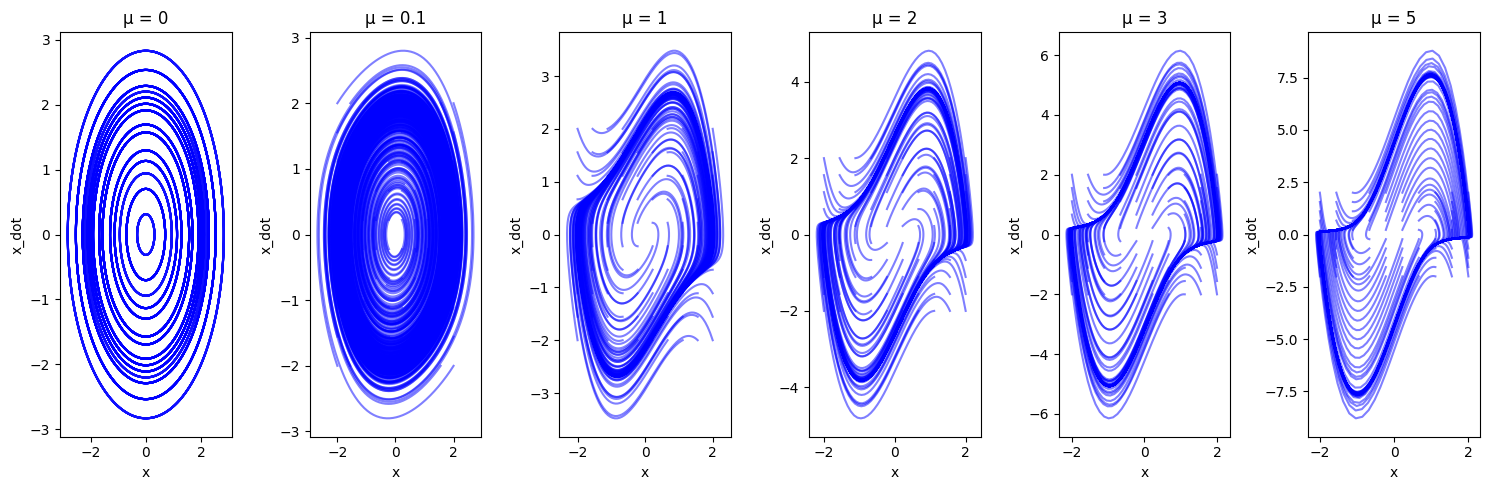

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the differential equation as a function
def dXdt(t, X, mu):
    x, xdot = X
    dxdt = xdot
    dxdotdt = mu * (1 - x**2) * xdot - x
    return [dxdt, dxdotdt]

# Define the parameter values
mu_values = [0, 0.1, 1, 2, 3, 5]

# Initial conditions and time span
x0 = np.linspace(-2, 2, 10)
xdot0 = np.linspace(-2, 2, 10)
t_span = (0, 20)

# Create a grid of initial conditions
x0, xdot0 = np.meshgrid(x0, xdot0)

# Create subplots for different values of mu
fig, axs = plt.subplots(1, len(mu_values), figsize=(15, 5))
for i, mu in enumerate(mu_values):
    axs[i].set_title(f"µ = {mu}")
    for j in range(len(x0)):
        for k in range(len(x0[j])):
            initial_conditions = [x0[j][k], xdot0[j][k]]
            sol = solve_ivp(dXdt, t_span, initial_conditions, args=(mu,), t_eval=np.linspace(0, 20, 1000))
            axs[i].plot(sol.y[0], sol.y[1], 'b-', alpha=0.5)

    axs[i].set_xlabel('x')
    axs[i].set_ylabel('x_dot')

plt.tight_layout()
plt.show()
